---
# Scaling data for clustering
---

Clustering algorithms use the similarity distance between the items to assign them to clusters. The difference in the scale and value of a feature of the item woul distort the clustering. 

We will first generate the points and then scale the X values.

## Generate random data points for clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

# Number of data items generated
number_of_samples = 100 
number_of_clusters = 3

X, y = make_blobs(n_samples=number_of_samples, centers=number_of_clusters,
                random_state=0, cluster_std=0.60)


data = pd.concat( [pd.DataFrame( X ), pd.DataFrame( y ) ], axis = 1 )

data.columns = ["Height", "Weight", "Group"]
data.head()

,Height,Weight,Group
0,2.401222,0.772684,1
1,0.438990,4.535929,0
2,2.623619,0.804658,1
3,0.007931,4.176143,0
4,0.347138,3.451777,0


## Scale up one dimension of the data points

Let us say that an catastrophic alient invasion causes heights to get increased by a magnitude of 100. This causes one dimension to be an order of magnitue higher than other.

In [4]:
data['Height'] = data['Height'] * 100
data.head()

,Height,Weight,Group
0,24012.220114,0.772684,1
1,4389.901418,4.535929,0
2,26236.187021,0.804658,1
3,79.313700,4.176143,0
4,3471.382995,3.451777,0


## Visualize raw data

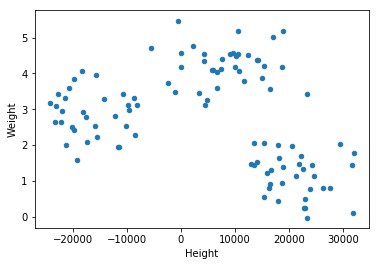

In [5]:
%matplotlib inline

data.plot(kind='scatter', x='Height', y='Weight');

## Cluster the data

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = number_of_clusters)
model.fit(data[ ["Height", "Weight"] ] )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Visualize the clustering

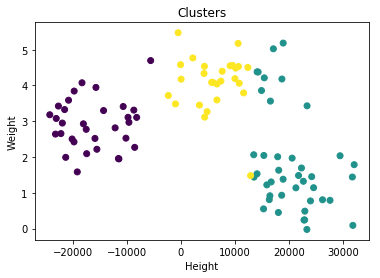

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data['Height'], data['Weight'], c = model.labels_)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Clusters")

## Silhouete Coefficient

In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(data[ ["Height", "Weight"] ], model.labels_)

0.60021461587350289



## Scale the dimensions or features

This is done by subtracting the feature value from the mean feature value and dividing it by the standard deviation of the feature values. 

Sklearn provides an inbuild function [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to do this. 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform( data[['Height', 'Weight']])
print(type(data_scaled))

<class 'numpy.ndarray'>


## Cluster again and visualize the results

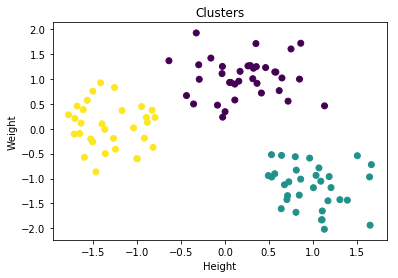

In [12]:
model_scaled = KMeans(n_clusters = number_of_clusters)
model_scaled.fit(data_scaled)
plt.scatter(data_scaled[:,0], data_scaled[:,1], c = model_scaled.labels_)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Clusters")

## The End